### CDF/PDF for density
* $f(a)$ is a PDF:
$$Pr(a\leq X \leq b) = \int_a^b f(x) dx$$
* $F(a)$ is a CDF:
$$F(a) = Pr(X\leq a) = \int_{-\infty}^a f(x) dx$$
* 
$$f(a)  = \left. \frac{d}{dx} F(x) \right|_{x=a} $$

### CDF for empirical distribution
We have a sample $x_1,\ldots,x_n$
$$\hat{F}(a) = \frac{1}{n} |\{i \mbox{ such that } x_i \leq a\}|$$  
* What about the PDF for empirical distribution? We cannot take the derivative...  The closest we have to and empirical pdf is the histogram.

### Calculating the probability of a segment
* The true probability
$$P(a\leq X \leq b) = \int_a^b f(x) dx = \int_{-\infty}^b f(x)dx - \int_{-\infty}^a f(x)dx = $$  
  
* The empirical probability. We have a sample $x_1,\ldots,x_n$
$$\hat{P}(a \leq X \leq b) = \frac{1}{n} |\{i \mbox{ such that } a \leq x_i \leq b\} = $$

### Empirical CDFs vs. histograms
* The histogram coverges to the density function
* The emprirical CDF converges to the true CDF
* The convergence of the CDF is much faster.

In [1]:
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.stats import norm
def plot_normal(mu=1,sigma=1, n=20, m=100, plot_pdf_model=True,plot_cdf_model=True,
               plot_pdf_empir=True,plot_cdf_empir=True):
    s = np.random.normal(mu, sigma, n)

    xmin=-4; xmax=6; delta=1/n
    x=arange(xmin,xmax,delta)
    if plot_cdf_model:
        _cdf=norm.cdf(x,loc=mu,scale=sigma)
        plot(x,_cdf)
    if plot_pdf_model:
        _pdf=norm.pdf(x,loc=mu,scale=sigma)
        plot(x,_pdf)
    grid()
    if plot_cdf_empir:
        q=sorted(s)
        P=arange(0,1,1/s.shape[0])
        plot(q,P)
    if plot_pdf_empir:
        plt.hist(s, 30, density=True);
    
    return

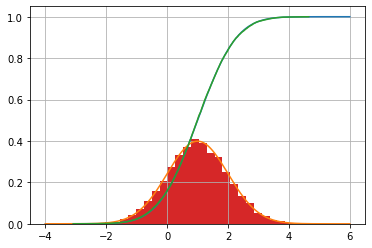

In [3]:
plot_normal(n=10000)

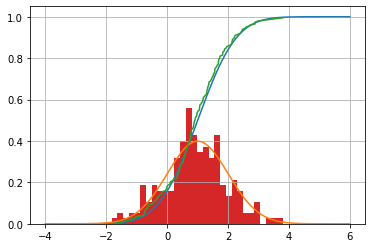

In [4]:
plot_normal(n=200)

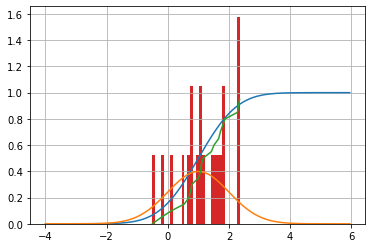

In [5]:
plot_normal(n=20)

## Sorting data that comes from a distribution

The best sorting time for arbitrary data: $O(n \log n)$ (quicksort)

For data that is sampled from a fixed distribution (Independent Identically Distributed or IID) we can sort in $O(n)$ time!

### Easiest case: Uniform distribution.

In [6]:
n=10000
R=array([random.uniform(0,1) for i in range(n)])

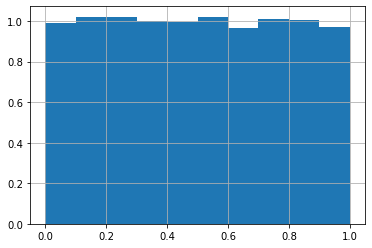

In [7]:
hist(R,density=True);
grid()

### Create a list of lists
* Size of (outside) list is $n$.
* Each inside list starts empty.


In [8]:
m=n #int(n/10)
L=[[] for i in range(m)]

for r in R:
    i=int(r*m) # scale random number from [0,1] to [0,n]
    L[i].append(r) #append number to list at location i

In [9]:
L[:2] 

[[7.861791577756794e-05],
 [0.00016030646462572573, 0.000166225597451386, 0.00018674467582424636]]

### Size of fullest bin

In [10]:
lengths=[len(l) for l in L]
min(lengths),max(lengths)

(0, 6)

### sort each short list and concatanate

In [11]:
_sorted=[]
for l in L:
    _sorted +=sorted(l)

In [12]:
_sorted[:10]

[7.861791577756794e-05,
 0.00016030646462572573,
 0.000166225597451386,
 0.00018674467582424636,
 0.00028610428770914353,
 0.0005508610181924611,
 0.0006412241131720231,
 0.0008850384896413876,
 0.0009175362803005571,
 0.0010736533642344837]

In [13]:
resort=sorted(_sorted)   # checking that the order is good.
resort==_sorted

True

### What about distributions other than uniform
We can use the CDF of a distribution to transform it into a uniform distribution. 

In [14]:
from scipy.stats import norm

### Transforming the distribution to a uniform distribution
We use $F$ to denote the CDF
* $F(x) = P(X \leq x)$
*
* $X$ is a random variable, therefor $F(X)$ is a random variable.
*
* What is the distribution of the RV $F(X)$ ?
* $0 \leq F(X) \leq 1$, Therefor $P(0 \leq F(X) \leq 1) = $ ?
* What is the probability that $0\leq A \leq F(X) \leq B \leq 1$

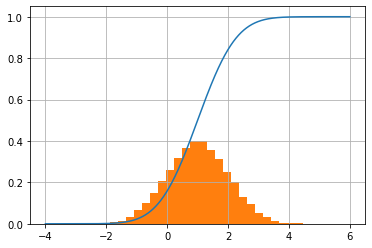

In [15]:
#figure(figsize=[15,10])
mu=1; sigma=1; n=10000; m=100
s = np.random.normal(mu, sigma, n)

xmin=-4; xmax=6; delta=1/n
x=arange(xmin,xmax,delta)
cdf=norm.cdf(x,loc=mu,scale=sigma)
plot(x,cdf)
grid()
plt.hist(s, 30, density=True);

* $F(x)$ is a non-decreasing function from $(-\infty,+\infty)$ to $[0,1]$. Therefor for any $0 \leq A \leq B \leq 1$ there exists $a \leq b$ such that $F(a)=A$,$F(b)=B$.

* $P( a < X \leq b) = P(A \leq F(X) \leq B)$
*
* On the other hand $P( a \leq X \leq b) = F(b)-F(a) = $
*
* Therefor, for any $0 \leq A \leq B \leq 1$:  
$ P(A \leq F(X) \leq B) = B-A $
* 
** Which implies that the distribution of $F(X)$ is ? 

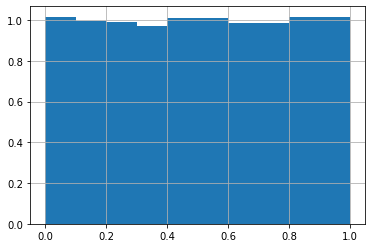

In [16]:

index=np.array(x.shape[0]*(s-xmin)/(xmax-xmin),dtype=np.int)
scaled=cdf[index]
hist(scaled,density=True);
grid()

### We can now use the sorting method for the uniform distribution

In [17]:
m=100
L=[[] for i in range(m)]

for j in range(s.shape[0]):
    r=s[j]
    _scale=scaled[j]
    i=int(_scale*m)
    L[i].append(r)

In [18]:
_sorted=[]
for l in L:
    _sorted +=sorted(l)

In [19]:
_sorted[:10]

[-2.9311691363378203,
 -2.364223701828682,
 -2.337831497954562,
 -2.220804646555176,
 -2.21394706379438,
 -2.2075718778310285,
 -2.1968479483669032,
 -2.140905822554838,
 -2.1340229817013556,
 -2.016490186168462]

In [20]:
resort=sorted(_sorted)   # checking that the order is good.
resort==_sorted

True

###  Sorting when the distribution is not known
When the distribution is not know, we can use the empirical CDF

In [21]:
## Lets generate a complicated distribution
n=20000
s1 = np.random.normal(0, 1, n)
s2 = np.random.normal(5, 2, n)
s3 = np.random.normal(-10, 5, 2*n)
s=concatenate([s1,s2,s3])
s.shape

(80000,)

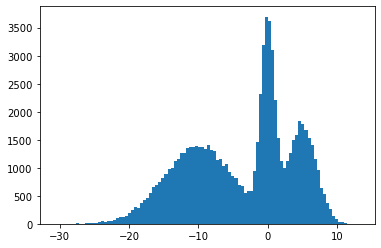

In [22]:
hist(s,bins=100);

### Calculating the CDF requires sorting
So calculating the CDF requires sorting and $O(n)$ sorting requires knowing the CDF ...

Are we stuck in an infinite loop?

In [23]:
def plot_CDF(s):
    x=sorted(s)
    p=arange(0,1,1/s.shape[0])
    plot(x,p,label=str(s.shape[0]))

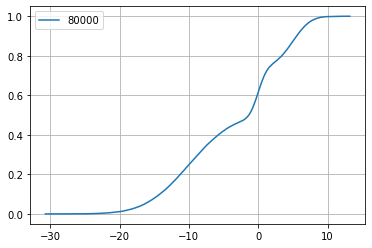

In [24]:
plot_CDF(s)
grid()
legend();

### Are we stuck?

* **No!** we can approximate the CDF using a sample
* Estimating the CDF does not require many examples (proof: more advanced probability)

In [25]:
from numpy.random import choice

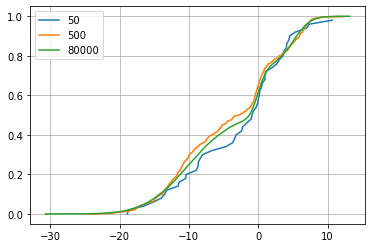

In [26]:
#figure(figsize=[15,10])
for m in [50,500,80000]:
    sample=choice(s,m)
    plot_CDF(sample)
grid()
legend()

###  Problem in HW5 
We don't need a perfect CDF, we just need the resulting distribution to be approximately uniform over [0,1]

Write a program that takes as input $n$ data points drawn from some distribution, and sorts this data in $O(n)$